In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install kaggle

In [4]:
!mkdir ~/.kaggle

In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other


In [ ]:
# List contents of the second potential data directory
print("\nContents of /content/chest_xray_data/chest_xray/chest_xray/:")
# Use a try-except block in case the inner folder doesn't exist
try:
    !ls /content/chest_xray_data/chest_xray/chest_xray/
except:
    print("Inner /chest_xray/ folder not found or accessible.")


Contents of /content/chest_xray_data/chest_xray/chest_xray/:
test  train  val


In [8]:
# Re-unzip the dataset into the clean directory
!unzip -q chest-xray-pneumonia.zip -d /content/chest_xray_cleaned/

In [9]:
# List contents of the new clean data directory
print("Contents of /content/chest_xray_cleaned/:")
!ls /content/chest_xray_cleaned/

Contents of /content/chest_xray_cleaned/:
chest_xray


In [10]:
# Define the main directory where you unzipped the data
data_dir = '/content/chest_xray_cleaned/chest_xray/' # <-- FINAL CORRECTED PATH

In [11]:
# Step 3.1: Import Necessary Libraries
import os # Used for interacting with the operating system, like listing directories
import shutil # Used for file operations (though not strictly needed for exploration)
import random # Used for selecting random samples
from PIL import Image # Pillow library, used for opening and manipulating images
import numpy as np # For numerical operations
import matplotlib.pyplot as plt # For plotting and displaying images
import matplotlib.image as mpimg # Another way to load images for matplotlib

print("Libraries imported successfully.")

Libraries imported successfully.


In [12]:
# Step 3.2: Define Dataset Paths and Count Images

# Define the main directory where you unzipped the data
# IMPORTANT: Ensure this path is correct based on your extraction location!
data_dir = '/content/chest_xray_cleaned/chest_xray/' # <-- VERIFY THIS PATH IS CORRECT!

# Define paths for train, validation, and test sets
train_dir = os.path.join(data_dir, 'train')
val_dir = os.path.join(data_dir, 'val')
test_dir = os.path.join(data_dir, 'test')

# Check if the directories exist before counting (good practice)
if not os.path.exists(train_dir):
    print(f"Error: Training directory not found at {train_dir}")
elif not os.path.exists(val_dir):
     print(f"Error: Validation directory not found at {val_dir}")
elif not os.path.exists(test_dir):
     print(f"Error: Test directory not found at {test_dir}")
else:
    # Count images in each directory
    train_normal_count = len(os.listdir(os.path.join(train_dir, 'NORMAL')))
    train_pneumonia_count = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))

    val_normal_count = len(os.listdir(os.path.join(val_dir, 'NORMAL')))
    val_pneumonia_count = len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))

    test_normal_count = len(os.listdir(os.path.join(test_dir, 'NORMAL')))
    test_pneumonia_count = len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))

    # Store counts in a dictionary for easier access
    counts = {
        'train_normal': train_normal_count,
        'train_pneumonia': train_pneumonia_count,
        'val_normal': val_normal_count,
        'val_pneumonia': val_pneumonia_count,
        'test_normal': test_normal_count,
        'test_pneumonia': test_pneumonia_count
    }

    # Print the counts
    print("--- Dataset Image Counts ---")
    print(f"Train - Normal: {counts['train_normal']}")
    print(f"Train - Pneumonia: {counts['train_pneumonia']}")
    print(f"Validation - Normal: {counts['val_normal']}")
    print(f"Validation - Pneumonia: {counts['val_pneumonia']}")
    print(f"Test - Normal: {counts['test_normal']}")
    print(f"Test - Pneumonia: {counts['test_pneumonia']}")
    print("----------------------------")

--- Dataset Image Counts ---
Train - Normal: 1341
Train - Pneumonia: 3875
Validation - Normal: 8
Validation - Pneumonia: 8
Test - Normal: 234
Test - Pneumonia: 390
----------------------------


In [13]:
# Step 3.3: Analyze Class Distribution

# Ensure counts dictionary exists from Step 3.2
if 'counts' in globals():
    # Calculate total counts
    total_train = counts['train_normal'] + counts['train_pneumonia']
    total_val = counts['val_normal'] + counts['val_pneumonia']
    total_test = counts['test_normal'] + counts['test_pneumonia']
    total_dataset = total_train + total_val + total_test

    # Calculate percentages for training set
    train_normal_percent = (counts['train_normal'] / total_train) * 100
    train_pneumonia_percent = (counts['train_pneumonia'] / total_train) * 100

    print("--- Dataset Class Distribution (Training Set) ---")
    print(f"Total Training Images: {total_train}")
    print(f"Train - Normal: {counts['train_normal']} ({train_normal_percent:.2f}%)")
    print(f"Train - Pneumonia: {counts['train_pneumonia']} ({train_pneumonia_percent:.2f}%)")
    print("-------------------------------------------------")

    print("\n--- Dataset Total Class Distribution ---")
    print(f"Total Dataset Images: {total_dataset}")
    print(f"Normal: {counts['train_normal'] + counts['val_normal'] + counts['test_normal']}")
    print(f"Pneumonia: {counts['train_pneumonia'] + counts['val_pneumonia'] + counts['test_pneumonia']}")
    print("------------------------------------------")
else:
    print("Counts dictionary not found. Please run Step 3.2 first.")

--- Dataset Class Distribution (Training Set) ---
Total Training Images: 5216
Train - Normal: 1341 (25.71%)
Train - Pneumonia: 3875 (74.29%)
-------------------------------------------------

--- Dataset Total Class Distribution ---
Total Dataset Images: 5856
Normal: 1583
Pneumonia: 4273
------------------------------------------


Sample Normal X-rays (Training Set):


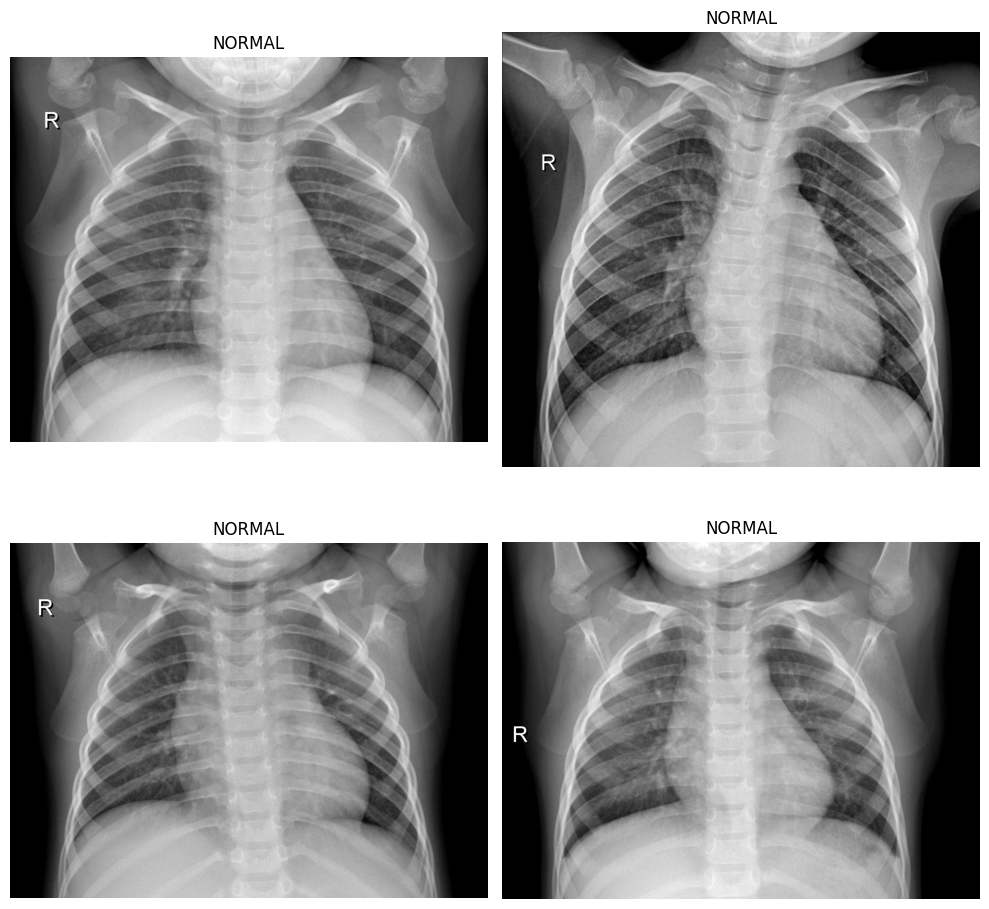


Sample Pneumonia X-rays (Training Set):


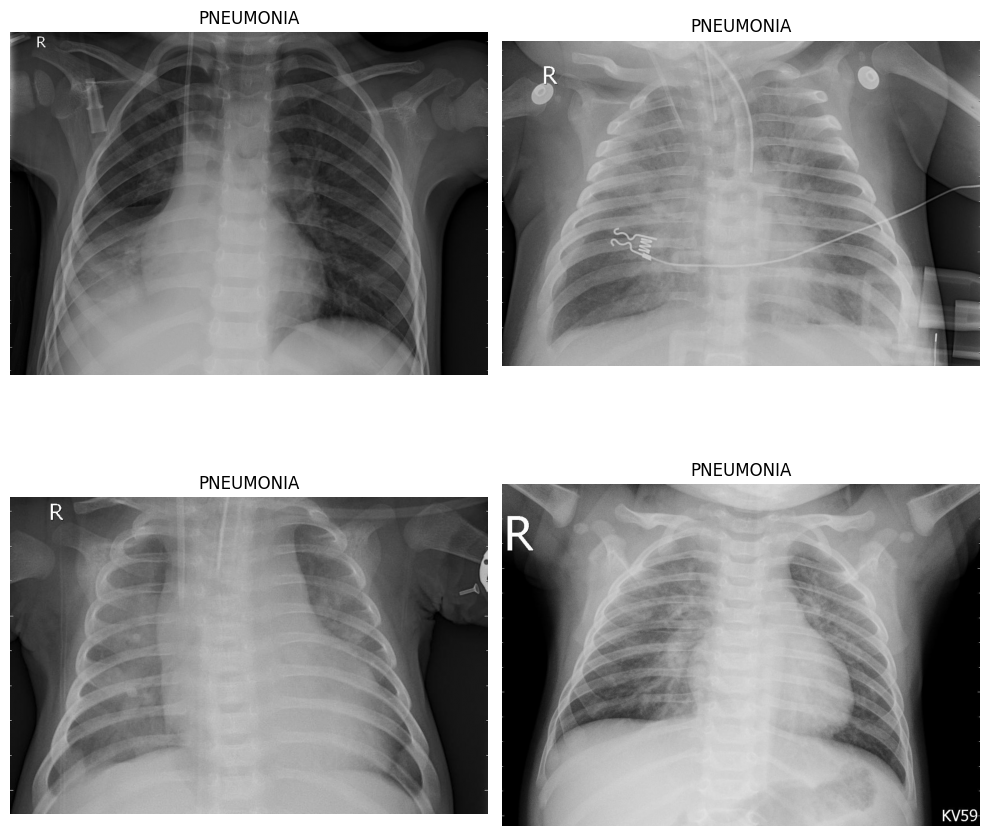

In [14]:
# Step 3.4: Display Sample Images

# Ensure train_dir is defined from Step 3.2
if 'train_dir' in globals():
    def display_random_images(directory, count=4):
        """Displays a random sample of images from a directory."""
        # Check if the directory exists
        if not os.path.exists(directory):
            print(f"Error: Directory not found at {directory}")
            return

        image_files = [f for f in os.listdir(directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
        if not image_files:
            print(f"No image files found in {directory}")
            return

        random_images = random.sample(image_files, min(count, len(image_files)))

        plt.figure(figsize=(10, 10))
        for i, img_name in enumerate(random_images):
            img_path = os.path.join(directory, img_name)
            try:
                img = mpimg.imread(img_path)
                plt.subplot(2, 2, i + 1) # Create a 2x2 grid of plots
                plt.imshow(img, cmap='gray') # Use 'gray' cmap for X-rays
                # Extract class name from path (e.g., 'NORMAL' or 'PNEUMONIA')
                class_name = os.path.basename(directory)
                plt.title(class_name)
                plt.axis('off') # Hide axes
            except Exception as e:
                print(f"Could not load image {img_name}: {e}")
                continue
        plt.tight_layout() # Adjust layout to prevent titles overlapping
        plt.show()

    # Display random Normal images from the training set
    print("Sample Normal X-rays (Training Set):")
    display_random_images(os.path.join(train_dir, 'NORMAL'))

    # Display random Pneumonia images from the training set
    print("\nSample Pneumonia X-rays (Training Set):")
    display_random_images(os.path.join(train_dir, 'PNEUMONIA'))

else:
    print("train_dir variable not found. Please run Step 3.2 first.")

In [15]:
# Step 4.1: Import Keras Preprocessing Libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Keras ImageDataGenerator imported.")

Keras ImageDataGenerator imported.


In [16]:
# Step 4.2: Set Hyperparameters for Image Loading

# All images will be resized to this size
IMAGE_SIZE = (150, 150) # A common size for starting with CNNs

# Number of images to process in a batch
BATCH_SIZE = 32 # A common batch size

# Define the base path to your cleaned dataset
# Make sure this matches the corrected path from Step 3.2
base_data_dir = '/content/chest_xray_cleaned/chest_xray/'


print(f"Image size set to: {IMAGE_SIZE}")
print(f"Batch size set to: {BATCH_SIZE}")
print(f"Base data directory set to: {base_data_dir}")

# Verify the train, val, test directories exist within the base path
train_path = os.path.join(base_data_dir, 'train')
val_path = os.path.join(base_data_dir, 'val')
test_path = os.path.join(base_data_dir, 'test')

if not os.path.exists(train_path):
     print(f"Error: Train path not found at {train_path}")
if not os.path.exists(val_path):
     print(f"Error: Val path not found at {val_path}")
if not os.path.exists(test_path):
     print(f"Error: Test path not found at {test_path}")

Image size set to: (150, 150)
Batch size set to: 32
Base data directory set to: /content/chest_xray_cleaned/chest_xray/


In [17]:
# Step 4.3: Create Image Data Generator for Training

train_datagen = ImageDataGenerator(
    rescale=1./255,           # Scale pixel values from [0, 255] to [0, 1]
    rotation_range=20,        # Rotate images by up to 20 degrees
    width_shift_range=0.1,    # Shift images horizontally by up to 10% of width
    height_shift_range=0.1,   # Shift images vertically by up to 10% of height
    shear_range=0.1,          # Apply shear transformation
    zoom_range=0.1,           # Apply zoom
    horizontal_flip=True,     # Randomly flip images horizontally
    # vertical_flip=True,     # Vertical flips might not be suitable for X-rays, keeping commented
    fill_mode='nearest'       # How to fill pixels that appear after transformations
)

# Now link the generator to the training data directory
# Ensure train_path is correctly defined from Step 4.2
train_generator = train_datagen.flow_from_directory(
    os.path.join(base_data_dir, 'train'), # Source directory using base_data_dir
    target_size=IMAGE_SIZE,   # Resize images to this size (defined in 4.2)
    batch_size=BATCH_SIZE,    # Number of images per batch (defined in 4.2)
    class_mode='binary'       # 'binary' because we have 2 classes (NORMAL, PNEUMONIA)
    # seed=42                 # Optional: set a seed for reproducibility if needed
)

print("Training data generator created and linked to directory.")

Found 5216 images belonging to 2 classes.
Training data generator created and linked to directory.


In [18]:
# Step 4.4: Create Image Data Generators for Validation and Test

# We only need to rescale and resize for validation/test
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Ensure val_path and test_path are correctly defined from Step 4.2
val_generator = val_datagen.flow_from_directory(
    os.path.join(base_data_dir, 'val'), # Source directory using base_data_dir
    target_size=IMAGE_SIZE,   # Resize images (defined in 4.2)
    batch_size=BATCH_SIZE,    # Number of images per batch (defined in 4.2)
    class_mode='binary'       # Binary classification
    # seed=42                 # Optional: set a seed
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(base_data_dir, 'test'), # Source directory using base_data_dir
    target_size=IMAGE_SIZE,   # Resize images (defined in 4.2)
    batch_size=BATCH_SIZE,    # Number of images per batch (defined in 4.2)
    class_mode='binary'       # Binary classification
    # shuffle=False           # Important for test set if you need to link predictions back to filenames
    # seed=42                 # Optional: set a seed
)

print("Validation and test data generators created and linked to directories.")

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Validation and test data generators created and linked to directories.



Shape of one batch of images from train_generator:
(32, 150, 150, 3)

Shape of one batch of labels from train_generator:
(32,)

First 5 labels from the batch:
[1. 1. 0. 1. 1.]

Class indices mapping:
{'NORMAL': 0, 'PNEUMONIA': 1}


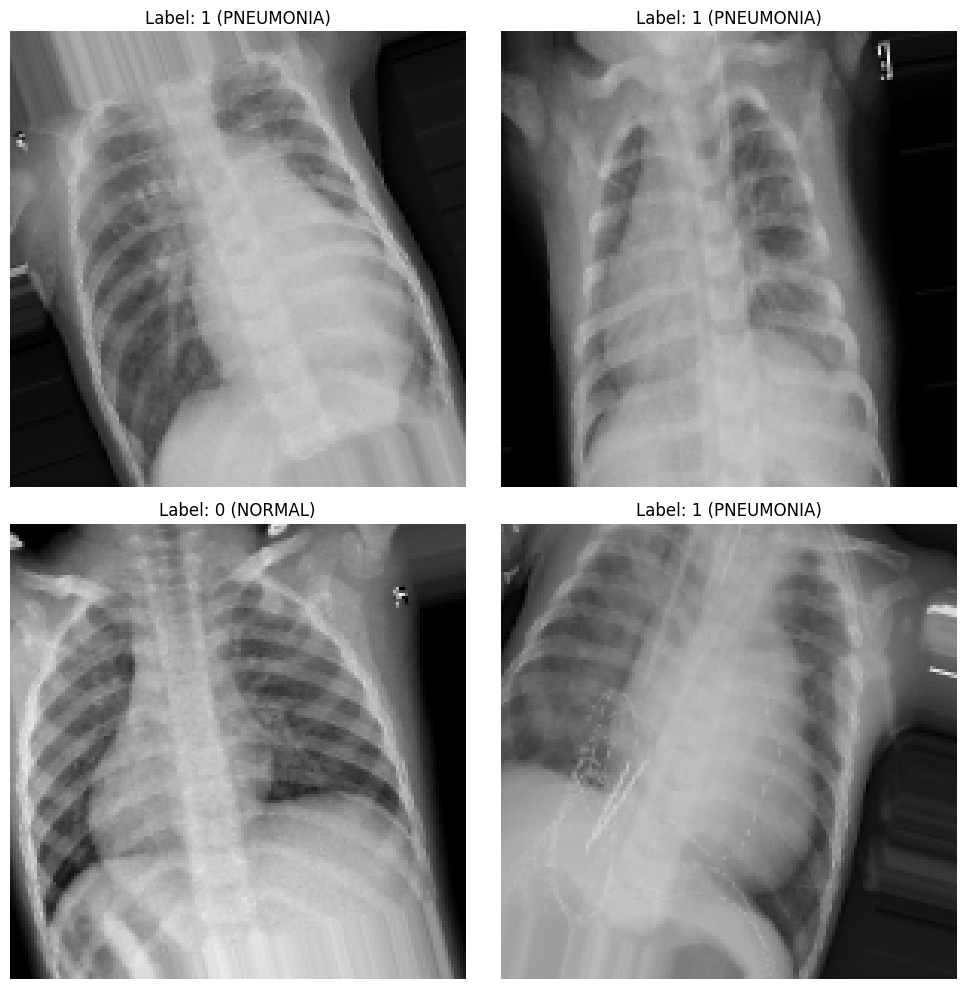

In [19]:
# Step 4.5: Understand Generator Output

# Get one batch from the training generator
# Running next() advances the generator, so each time you run this, you get a new batch
first_batch_images, first_batch_labels = next(train_generator)

print("\nShape of one batch of images from train_generator:")
print(first_batch_images.shape) # Should be (BATCH_SIZE, IMAGE_SIZE[0], IMAGE_SIZE[1], 3)

print("\nShape of one batch of labels from train_generator:")
print(first_batch_labels.shape) # Should be (BATCH_SIZE,)

print("\nFirst 5 labels from the batch:")
print(first_batch_labels[:5]) # Show the first few labels (0s or 1s)

# The 'class_indices' attribute maps class names to numeric labels (e.g., 'NORMAL': 0, 'PNEUMONIA': 1)
# This is determined alphabetically by flow_from_directory
print("\nClass indices mapping:")
print(train_generator.class_indices)


# Optional: Display a few images from this batch to see preprocessing/augmentation effect
plt.figure(figsize=(10, 10))
for i in range(min(4, first_batch_images.shape[0])): # Display up to 4 images
    plt.subplot(2, 2, i + 1)
    # imshow expects values in [0, 1] or [0, 255]. Since we rescaled to [0, 1], it works directly.
    plt.imshow(first_batch_images[i], cmap='gray') # Use gray colormap for X-rays
    # Get the corresponding label (0 or 1) and map it back to the class name
    label = int(first_batch_labels[i]) # Cast label to integer
    class_name = list(train_generator.class_indices.keys())[list(train_generator.class_indices.values()).index(label)]
    plt.title(f"Label: {label} ({class_name})")
    plt.axis('off')

plt.tight_layout()
plt.show()

In [20]:
# Step 5.1: Import Keras Layers and Pre-trained Model
from tensorflow.keras.models import Sequential # To build a model layer by layer
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D # Common layer types
from tensorflow.keras.applications import MobileNetV2 # The pre-trained model we will use
from tensorflow.keras import regularizers # Optional: for adding regularization

print("Keras model layers and MobileNetV2 imported.")

Keras model layers and MobileNetV2 imported.


In [21]:
# Step 5.2: Load the Pre-trained Base Model (MobileNetV2)

# Load MobileNetV2 weights pre-trained on ImageNet
# include_top=False means we don't include the original classification layer
# input_shape specifies the expected input size of our images
base_model = MobileNetV2(weights='imagenet',
                         include_top=False,
                         input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)) # Use IMAGE_SIZE from Step 4.2

# Freeze the base model layers so their weights are not updated during initial training
base_model.trainable = False

print("MobileNetV2 base model loaded and frozen.")

<ipython-input-21-1d2f20dc0108>:6: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet',


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
MobileNetV2 base model loaded and frozen.


In [22]:
# Step 5.3: Add Custom Classification Layers

# We'll use a Sequential model to stack our layers on top of the base model
model = Sequential()

# Add the pre-trained base model as the first layer
model.add(base_model)

# Add a Global Average Pooling layer
# This layer reduces the spatial dimensions (height and width) while keeping depth (channels)
# It helps reduce the number of parameters
model.add(GlobalAveragePooling2D())

# Add one or more Dense layers (standard fully connected layers)
# These layers learn complex combinations of the features
# We add a Dense layer with 128 neurons and ReLU activation
model.add(Dense(128, activation='relu'))

# Optional: Add Dropout for regularization
# Dropout randomly sets a fraction of input units to 0 at each update during training.
# This helps prevent overfitting. You can uncomment and experiment later if needed.
# model.add(Dropout(0.5)) # Example: 50% dropout

# Add the output layer
# One neuron (since it's binary classification)
# 'sigmoid' activation outputs a probability between 0 and 1
model.add(Dense(1, activation='sigmoid'))

print("Custom classification layers added on top of the base model.")

Custom classification layers added on top of the base model.


In [23]:
# Step 5.4: View Model Summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,422,081 (9.24 MB)

 Trainable params: 164,097 (641.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [24]:
# Step 6.1: Compile the Model
import tensorflow as tf # Import tensorflow itself to access metrics like AUC

# Define the optimizer, loss function, and metrics
model.compile(
    optimizer='adam',                     # Adam optimizer is a good default choice
    loss='binary_crossentropy',           # Standard loss for binary classification
    metrics=[
        'accuracy',                       # Simple accuracy metric
        tf.keras.metrics.AUC(name='auc')  # AUC is important for imbalanced datasets
        # You could add others like:
        # tf.keras.metrics.Precision(name='precision'),
        # tf.keras.metrics.Recall(name='recall')
    ]
)

print("Model compiled successfully.")

Model compiled successfully.


In [25]:
# Step 7.1: Calculate Steps per Epoch and Validation Steps
import math # Need this for ceiling calculation

# Get the total number of images from the generators
# These counts come from the successful runs in Step 4.3 and 4.4 outputs
total_train_images = train_generator.samples
total_val_images = val_generator.samples
total_test_images = test_generator.samples # Not used for steps, but good to have

# Calculate steps
# steps_per_epoch = total_train_images / BATCH_SIZE
# validation_steps = total_val_images / BATCH_SIZE

# Use math.ceil to ensure we cover all images, even if the last batch is smaller
steps_per_epoch = math.ceil(total_train_images / BATCH_SIZE)
validation_steps = math.ceil(total_val_images / BATCH_SIZE)


print(f"Total training images: {total_train_images}")
print(f"Total validation images: {total_val_images}")
print(f"Total test images: {total_test_images}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Steps per epoch: {steps_per_epoch}") # Expected: ceil(5216 / 32) = 163
print(f"Validation steps: {validation_steps}") # Expected: ceil(16 / 32) = 1

Total training images: 5216
Total validation images: 16
Total test images: 624
Batch Size: 32
Steps per epoch: 163
Validation steps: 1


In [26]:
# Step 7.2: Define Callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define the path where you want to save the best model
# You can save it to your mounted Google Drive
model_save_path = '/content/drive/MyDrive/chest_xray_model_best.h5' # Saves to your Drive

# ModelCheckpoint: Save the best model based on validation AUC
checkpoint_callback = ModelCheckpoint(
    filepath=model_save_path,
    monitor='val_auc',          # Metric to monitor (validation AUC)
    save_best_only=True,        # Save only the model with the best val_auc
    mode='max',                 # 'max' because we want to maximize AUC
    verbose=1                   # Print messages when saving
)

# EarlyStopping: Stop training if validation AUC doesn't improve for 'patience' epochs
early_stopping_callback = EarlyStopping(
    monitor='val_auc',          # Metric to monitor (validation AUC)
    patience=5,                 # Number of epochs with no improvement after which training will be stopped
    mode='max',                 # 'max' because we want to maximize AUC
    restore_best_weights=True,  # Restore model weights from the epoch with the best value
    verbose=1                   # Print messages when stopping
)

# Optional: ReduceLROnPlateau - Reduce learning rate when a metric has stopped improving.
# reduce_lr = ReduceLROnPlateau(
#     monitor='val_auc',
#     factor=0.1, # Reduce learning rate by a factor of 10
#     patience=3, # Number of epochs with no improvement after which learning rate will be reduced
#     mode='max',
#     verbose=1
# )


# Combine the callbacks into a list
# callbacks_list = [checkpoint_callback, early_stopping_callback, reduce_lr] # If using ReduceLROnPlateau
callbacks_list = [checkpoint_callback, early_stopping_callback]


print("Callbacks defined.")

Callbacks defined.


In [27]:
# Step 7.3: Train the Model

# Define the number of training epochs
# Start with a reasonable number, EarlyStopping will likely stop it sooner
EPOCHS = 20

# Train the model
# Use the generators defined in Step 4.3 and 4.4
history = model.fit(
    train_generator,                  # Training data generator
    steps_per_epoch=steps_per_epoch,  # Calculated in Step 7.1
    epochs=EPOCHS,                    # Number of epochs to train
    validation_data=val_generator,    # Validation data generator
    validation_steps=validation_steps,# Calculated in Step 7.1
    callbacks=callbacks_list          # List of callbacks defined in Step 7.2
)

print("\nModel training complete.")
# The 'history' object contains training logs (loss and metrics per epoch)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8737 - auc: 0.9114 - loss: 0.2954
Epoch 1: val_auc improved from -inf to 0.90625, saving model to /content/drive/MyDrive/chest_xray_model_best.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 176s 1s/step - accuracy: 0.8739 - auc: 0.9117 - loss: 0.2949 - val_accuracy: 0.8125 - val_auc: 0.9062 - val_loss: 0.4462
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9364 - auc: 0.9806 - loss: 0.1551
Epoch 2: val_auc improved from 0.90625 to 0.92188, saving model to /content/drive/MyDrive/chest_xray_model_best.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.9364 - auc: 0.9806 - loss: 0.1551 - val_accuracy: 0.7500 - val_auc: 0.9219 - val_loss: 0.3688
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9480 - auc: 0.9842 - loss: 0.1374
Epoch 3: val_auc improved from 0.92188 to 0.96875, saving model to /content/drive/MyDrive/chest_xray_model_best.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.9480 - auc: 0.9842 - loss: 0.1374 - val_accuracy: 0.8750 - val_auc: 0.9688 - val_loss: 0.2686
Epoch 4/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9439 - auc: 0.9843 - loss: 0.1377
Epoch 4: val_auc did not improve from 0.96875
163/163 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.9440 - auc: 0.9843 - loss: 0.1376 - val_accuracy: 0.7500 - val_auc: 0.9062 - val_loss: 0.4916
Epoch 5/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9456 - auc: 0.9855 - loss: 0.1368
Epoch 5: val_auc did not improve from 0.96875
163/163 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.9456 - auc: 0.9855 - loss: 0.1367 - val_accuracy: 0.8750 - val_auc: 0.9688 - val_loss: 0.3825
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9459 - auc: 0.9853 - loss: 0.1380
Epoch 6: val_auc did not improve from 0.96875
163/163 ━━━━━━━━━━━━━━━━━━━━ 168s 1s/step - accuracy: 0.9459 - auc: 0.9853 - loss: 0.1380 - val_accuracy: 0.8750 - 

In [28]:
# Step 8.1: Calculate Test Steps
import math # Ensure math is imported if not already

# Get the total number of test images (from Step 7.1 or 4.4 outputs)
total_test_images = test_generator.samples # Should be 624

# Calculate test steps
test_steps = math.ceil(total_test_images / BATCH_SIZE) # BATCH_SIZE is from Step 4.2

print(f"Total test images: {total_test_images}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Test steps: {test_steps}") # Expected: ceil(624 / 32) = 20

Total test images: 624
Batch Size: 32
Test steps: 20


In [29]:
# Step 8.2: Evaluate the Model on the Test Set

print("Evaluating model on the test set...")
# Use the test_generator from Step 4.4
# Use the test_steps calculated in Step 8.1
results = model.evaluate(test_generator, steps=test_steps, verbose=1)

print("\nTest Evaluation Results:")
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")
print(f"Test AUC: {results[2]:.4f}")

# Optional: Print which metric corresponds to which index in the results list
# print("\nMetric names and their index in results:")
# for i, name in enumerate(model.metrics_names):
#     print(f"{name}: {i}")

Evaluating model on the test set...
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 800ms/step - accuracy: 0.8867 - auc: 0.9578 - loss: 0.2715

Test Evaluation Results:
Test Loss: 0.2725
Test Accuracy: 0.8878
Test AUC: 0.9587


In [30]:
# Step 8.3.1: Load the Best Saved Model
from tensorflow.keras.models import load_model

# Define the path where the best model was saved (same as in Step 7.2)
model_save_path = '/content/drive/MyDrive/chest_xray_model_best.h5'

print(f"Loading the best model from: {model_save_path}")

# Load the model
# Need to tell Keras how to load the custom objects (like AUC metric) if any,
# but standard metrics usually load fine.
try:
    loaded_model = load_model(model_save_path)
    print("Best model loaded successfully.")
except Exception as e:
    print(f"Error loading model: {e}")
    print("Please ensure the file exists in your Google Drive and the path is correct.")
    loaded_model = None # Set to None if loading failed

# Now, the 'loaded_model' variable holds the model with the best weights.
# We will use this for re-evaluating and predicting.

Loading the best model from: /content/drive/MyDrive/chest_xray_model_best.h5


Best model loaded successfully.


In [31]:
# Step 9.1: Get Predictions on the Test Set
print("Getting predictions on the test set...")
# Use the test_generator and test_steps from previous steps
# Setting shuffle=False in test_generator in Step 4.4 is important here
predictions = loaded_model.predict(test_generator, steps=test_steps, verbose=1)

print("\nPredictions shape:", predictions.shape)
# The predictions are probabilities (values between 0 and 1)
print("First 5 predictions (probabilities):", predictions[:5].flatten())

Getting predictions on the test set...
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 865ms/step

Predictions shape: (624, 1)
First 5 predictions (probabilities): [0.18657798 0.97738206 0.9860402  0.16975066 0.99390537]


In [32]:
# Step 9.2: Get True Labels for the Test Set

# The test_generator stores the true labels
true_labels = test_generator.classes

print("True labels shape:", true_labels.shape)
print("First 5 true labels:", true_labels[:5])

# Map numeric labels back to class names using class_indices from Step 4.5
class_names = list(test_generator.class_indices.keys())
print("\nClass indices mapping:", test_generator.class_indices)

True labels shape: (624,)
First 5 true labels: [0 0 0 0 0]

Class indices mapping: {'NORMAL': 0, 'PNEUMONIA': 1}


In [33]:
# Step 9.3: Convert Probabilities to Class Predictions

# Convert probabilities to binary predictions using a threshold (e.g., 0.5)
predicted_classes = (predictions > 0.5).astype(int).flatten()

print("Predicted classes shape:", predicted_classes.shape)
print("First 5 predicted classes:", predicted_classes[:5])

Predicted classes shape: (624,)
First 5 predicted classes: [0 1 1 0 1]


Order of classes for report and matrix: ['NORMAL', 'PNEUMONIA']

Confusion Matrix (Rows: True, Cols: Predicted):


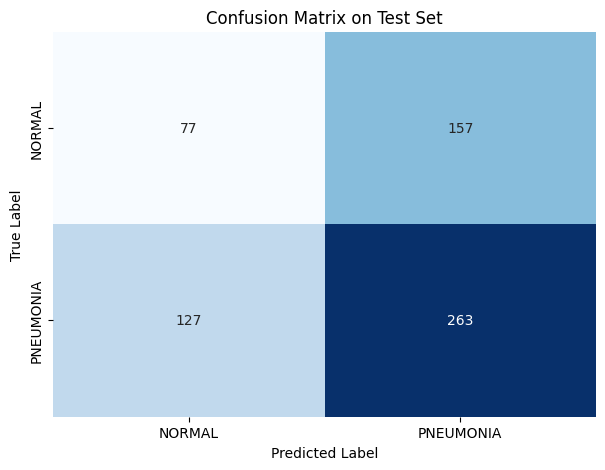


Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.38      0.33      0.35       234
   PNEUMONIA       0.63      0.67      0.65       390

    accuracy                           0.54       624
   macro avg       0.50      0.50      0.50       624
weighted avg       0.53      0.54      0.54       624



In [44]:
# Step 9.4: Calculate and Display Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns # For nice plots (make sure seaborn is installed, it usually is in Colab)
import matplotlib.pyplot as plt # For plotting

# Ensure class_names are correctly ordered based on test_generator.class_indices
# flow_from_directory usually orders them alphabetically, so it should be correct
class_names = list(test_generator.class_indices.keys()) # e.g., ['NORMAL', 'PNEUMONIA']
print("Order of classes for report and matrix:", class_names)

# Calculate Confusion Matrix
# The order matters: rows are True labels, columns are Predicted labels
# The order within the matrix follows the order in class_names
cm = confusion_matrix(true_labels, predicted_classes)

print("\nConfusion Matrix (Rows: True, Cols: Predicted):")
# print(cm) # Print raw matrix data if needed

# Display Confusion Matrix as a heatmap for better visualization
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.show()


# Calculate Classification Report
# Provides Precision, Recall, F1-score, and Support for each class
report = classification_report(true_labels, predicted_classes, target_names=class_names)

print("\nClassification Report:")
print(report)

Number of true Normal probabilities: 234
Number of true Pneumonia probabilities: 390


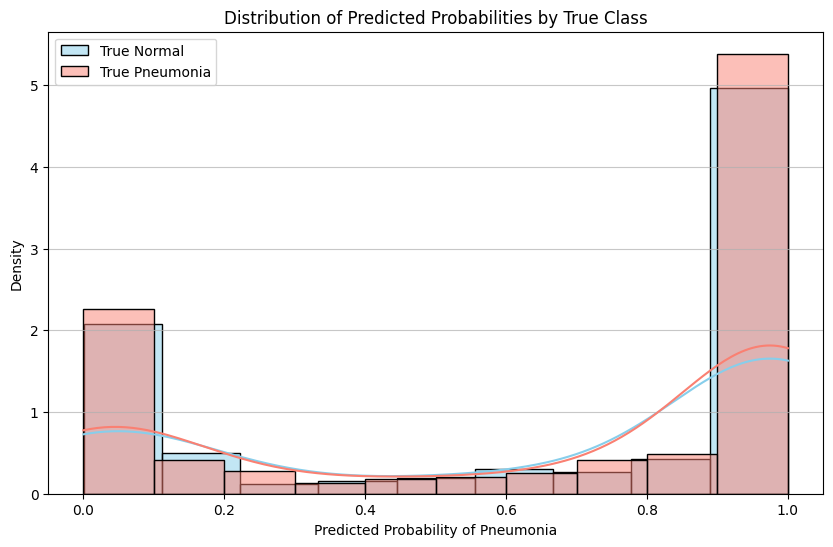

In [45]:
# Step 9.5: Visualize Predicted Probability Distributions
import matplotlib.pyplot as plt # Ensure matplotlib is imported
import seaborn as sns # Ensure seaborn is imported

# Ensure true_labels and predictions are available from Steps 9.2 and 9.1 re-runs

# Filter predictions based on true labels
normal_probabilities = predictions[true_labels == 0].flatten()
pneumonia_probabilities = predictions[true_labels == 1].flatten()

print(f"Number of true Normal probabilities: {len(normal_probabilities)}")
print(f"Number of true Pneumonia probabilities: {len(pneumonia_probabilities)}")


# Plot histograms of the probabilities
plt.figure(figsize=(10, 6))

sns.histplot(normal_probabilities, color='skyblue', label='True Normal', kde=True, stat='density', common_norm=False)
sns.histplot(pneumonia_probabilities, color='salmon', label='True Pneumonia', kde=True, stat='density', common_norm=False)

plt.title('Distribution of Predicted Probabilities by True Class')
plt.xlabel('Predicted Probability of Pneumonia')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', alpha=0.7)
plt.show()

In [36]:
# Step 11.1: Save the Trained Model (Full Model)
# Ensure the loaded_model variable exists from Step 8.3.1

if 'loaded_model' in globals() and loaded_model is not None:
    # Define the path to save the full model in .keras format
    full_model_save_path = '/content/drive/MyDrive/chest_xray_model_full.keras'

    print(f"Saving the full model to: {full_model_save_path}")

    # Save the model in the native Keras format
    loaded_model.save(full_model_save_path)

    print("Full model saved successfully.")
else:
    print("Error: loaded_model not found. Please run Step 8.3.1 first.")

Saving the full model to: /content/drive/MyDrive/chest_xray_model_full.keras
Full model saved successfully.


In [37]:
# Step 11.2: Load the Saved Model (Optional Verification)
from tensorflow.keras.models import load_model

# Define the path to the full model you just saved
full_model_load_path = '/content/drive/MyDrive/chest_xray_model_full.keras'

print(f"Loading the full model from: {full_model_load_path}")

# Load the model
try:
    reloaded_model = load_model(full_model_load_path)
    print("Full model loaded successfully for verification.")
    # You could optionally run reloaded_model.evaluate(test_generator, steps=test_steps)
    # to confirm the performance is the same as the loaded_model
except Exception as e:
    print(f"Error loading model: {e}")

Loading the full model from: /content/drive/MyDrive/chest_xray_model_full.keras
Full model loaded successfully for verification.


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 10 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [38]:
# Step 13.1: Ensure Best Model is Loaded
# Check if the loaded_model variable exists and is not None
if 'loaded_model' in globals() and loaded_model is not None:
    print("Proceeding with the loaded_model for fine-tuning.")
    # Optional: Check its test performance again to be sure
    # print("Verifying performance of loaded model...")
    # verify_results = loaded_model.evaluate(test_generator, steps=test_steps, verbose=0)
    # print(f"Loaded Model Test Accuracy: {verify_results[1]:.4f}, Test AUC: {verify_results[2]:.4f}")
else:
    print("Error: loaded_model is not available. Please run Step 1.6 and Step 8.3.1 again.")

# We will continue using the 'loaded_model' variable for fine-tuning
model_to_finetune = loaded_model

Proceeding with the loaded_model for fine-tuning.


In [39]:
# Step 13.2: Unfreeze Layers in the Base Model

# The base model (MobileNetV2) is the first layer in our Sequential model
base_model = model_to_finetune.layers[0]

# Check the number of layers in the base model
print(f"Total layers in the base model: {len(base_model.layers)}")

# Unfreeze the last ~30 layers of the base model
# Keep the rest frozen
unfreeze_from_layer = -30 # Unfreeze the last 30 layers

# Make sure the selected layer index is valid
if abs(unfreeze_from_layer) > len(base_model.layers):
    print("Warning: Number of layers to unfreeze is more than total layers in base model.")
    unfreeze_from_layer = 0 # Unfreeze all if index is invalid (use with caution)

# Iterate through the layers of the base model
for i, layer in enumerate(base_model.layers):
    if i >= len(base_model.layers) + unfreeze_from_layer: # Unfreeze layers from this index onwards
        layer.trainable = True
        # print(f"Layer {i}: {layer.name} is now trainable.")
    else:
        layer.trainable = False
        # print(f"Layer {i}: {layer.name} remains frozen.")

# The layers we added on top (GlobalAveragePooling, Dense, Output) are already trainable by default,
# but let's double check the trainable parameter count in the summary later.

print(f"\nUnfrozen the last {abs(unfreeze_from_layer)} layers of the base model.")

Total layers in the base model: 154

Unfrozen the last 30 layers of the base model.


In [40]:
# Step 13.3: Compile the Model with a Lower Learning Rate
from tensorflow.keras.optimizers import Adam # Import Adam explicitly to set learning rate

# Define a very low learning rate for fine-tuning
fine_tune_learning_rate = 0.00001 # Much smaller than the default 0.001

# Re-compile the model
model_to_finetune.compile(
    optimizer=Adam(learning_rate=fine_tune_learning_rate), # Use Adam with the new low learning rate
    loss='binary_crossentropy',                           # Same loss function
    metrics=[
        'accuracy',
        tf.keras.metrics.AUC(name='auc')                  # Same metrics
    ]
)

print(f"Model re-compiled with Adam optimizer and learning rate: {fine_tune_learning_rate}")

# Optional: Check the model summary again to see the trainable parameters
# The number of trainable parameters should now be higher than before
# model_to_finetune.summary()

Model re-compiled with Adam optimizer and learning rate: 1e-05


In [41]:
# Step 13.4: Calculate Class Weights
import numpy as np # Ensure numpy is imported

# Get counts from Step 3.2 (or rely on train_generator.n if it's consistent)
# Assuming you have the counts from Step 3.2
train_normal_count = 1341
train_pneumonia_count = 3875
total_train_images = train_normal_count + train_pneumonia_count # 5216

# Or get counts directly from the generator if preferred (should be consistent)
# total_train_images = train_generator.n
# # Assuming classes are ordered {'NORMAL': 0, 'PNEUMONIA': 1}
# train_normal_count = train_generator.class_indices['NORMAL'] # This would be wrong, need counts per class
# To get counts from generator:
# class_counts = np.bincount(train_generator.classes)
# train_normal_count = class_counts[0] # Assuming 0 is Normal
# train_pneumonia_count = class_counts[1] # Assuming 1 is Pneumonia


# Calculate class weights
# The formula is: total_samples / (number_of_samples_in_class * num_classes)
num_classes = 2
class_weights = {
    0: total_train_images / (train_normal_count * num_classes), # Weight for Normal (class 0)
    1: total_train_images / (train_pneumonia_count * num_classes) # Weight for Pneumonia (class 1)
}

print("Calculated Class Weights:")
print(class_weights)
# Expected weights: {0: ~1.94, 1: ~0.67} (Minority class gets higher weight)

Calculated Class Weights:
{0: 1.9448173005219984, 1: 0.6730322580645162}


In [42]:
# Step 14.1: Train the Fine-tuned Model

# Use the model that was re-compiled for fine-tuning (loaded_model)
# Use the same generators and steps from previous training (Steps 4.3, 4.4, 7.1)
# Use the same callbacks (Step 7.2). ModelCheckpoint will save the new best if it improves.
# Use the class_weights calculated in Step 13.4

# Define the number of training epochs for this phase
# We set it to 20 again, but EarlyStopping is likely to stop it sooner based on val_auc
EPOCHS_FINE_TUNE = 20

print(f"Starting fine-tuning training for up to {EPOCHS_FINE_TUNE} epochs...")
print("Monitoring val_auc for improvement.")

history_fine_tune = model_to_finetune.fit(
    train_generator,                  # Training data generator
    steps_per_epoch=steps_per_epoch,  # Calculated in Step 7.1 (163)
    epochs=EPOCHS_FINE_TUNE,          # Number of epochs for this phase
    validation_data=val_generator,    # Validation data generator
    validation_steps=validation_steps,# Calculated in Step 7.1 (1)
    callbacks=callbacks_list,         # List of callbacks (Checkpoint & Early Stopping)
    class_weight=class_weights        # Pass the calculated class weights (from Step 13.4)
)

print("\nFine-tuning training process finished.")
# The 'history_fine_tune' object contains logs for this training phase

Starting fine-tuning training for up to 20 epochs...
Monitoring val_auc for improvement.
Epoch 1/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8691 - auc: 0.9295 - loss: 0.7218
Epoch 1: val_auc did not improve from 0.96875
163/163 ━━━━━━━━━━━━━━━━━━━━ 223s 1s/step - accuracy: 0.8693 - auc: 0.9296 - loss: 0.7198 - val_accuracy: 0.8750 - val_auc: 0.9531 - val_loss: 0.4363
Epoch 2/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9253 - auc: 0.9791 - loss: 0.1862
Epoch 2: val_auc did not improve from 0.96875
163/163 ━━━━━━━━━━━━━━━━━━━━ 258s 1s/step - accuracy: 0.9253 - auc: 0.9791 - loss: 0.1863 - val_accuracy: 0.8125 - val_auc: 0.9531 - val_loss: 0.4243
Epoch 3/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9316 - auc: 0.9833 - loss: 0.1630
Epoch 3: val_auc did not improve from 0.96875
163/163 ━━━━━━━━━━━━━━━━━━━━ 261s 1s/step - accuracy: 0.9316 - auc: 0.9833 - loss: 0.1630 - val_accuracy: 0.8125 - val_auc: 0.9609 - val_loss: 0.4486
Epoch 4/20
163/163 ━━━━━━━

163/163 ━━━━━━━━━━━━━━━━━━━━ 205s 1s/step - accuracy: 0.9340 - auc: 0.9821 - loss: 0.1733 - val_accuracy: 0.8125 - val_auc: 0.9844 - val_loss: 0.3427
Epoch 6/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9456 - auc: 0.9890 - loss: 0.1300
Epoch 6: val_auc did not improve from 0.98438
163/163 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.9456 - auc: 0.9890 - loss: 0.1300 - val_accuracy: 0.8125 - val_auc: 0.9844 - val_loss: 0.3261
Epoch 7/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9490 - auc: 0.9893 - loss: 0.1288
Epoch 7: val_auc did not improve from 0.98438
163/163 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.9490 - auc: 0.9893 - loss: 0.1288 - val_accuracy: 0.8750 - val_auc: 0.9844 - val_loss: 0.2838
Epoch 8/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9443 - auc: 0.9906 - loss: 0.1235
Epoch 8: val_auc improved from 0.98438 to 1.00000, saving model to /content/drive/MyDrive/chest_xray_model_best.h5


163/163 ━━━━━━━━━━━━━━━━━━━━ 208s 1s/step - accuracy: 0.9443 - auc: 0.9906 - loss: 0.1235 - val_accuracy: 0.8750 - val_auc: 1.0000 - val_loss: 0.2743
Epoch 9/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9561 - auc: 0.9926 - loss: 0.1069
Epoch 9: val_auc did not improve from 1.00000
163/163 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.9561 - auc: 0.9926 - loss: 0.1070 - val_accuracy: 0.8750 - val_auc: 1.0000 - val_loss: 0.1732
Epoch 10/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9563 - auc: 0.9928 - loss: 0.1042
Epoch 10: val_auc did not improve from 1.00000
163/163 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - accuracy: 0.9563 - auc: 0.9928 - loss: 0.1042 - val_accuracy: 0.9375 - val_auc: 1.0000 - val_loss: 0.1703
Epoch 11/20
163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9491 - auc: 0.9899 - loss: 0.1190
Epoch 11: val_auc did not improve from 1.00000
163/163 ━━━━━━━━━━━━━━━━━━━━ 203s 1s/step - accuracy: 0.9491 - auc: 0.9899 - loss: 0.1190 - val_accuracy: 0.937

In [43]:
# Step 15.1: Evaluate Fine-tuned Model on Test Set

print("Evaluating the fine-tuned model on the test set...")
# Use the fine-tuned model object (model_to_finetune)
# Use the same test_generator and test_steps from previous steps (Step 8.1)
fine_tune_results = model_to_finetune.evaluate(test_generator, steps=test_steps, verbose=1)

print("\nFine-tuned Test Evaluation Results:")
print(f"Test Loss: {fine_tune_results[0]:.4f}")
print(f"Test Accuracy: {fine_tune_results[1]:.4f}")
print(f"Test AUC: {fine_tune_results[2]:.4f}")

Evaluating the fine-tuned model on the test set...
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 866ms/step - accuracy: 0.8567 - auc: 0.9574 - loss: 0.4066

Fine-tuned Test Evaluation Results:
Test Loss: 0.4156
Test Accuracy: 0.8574
Test AUC: 0.9514


In [46]:
# Step 17.1: Import Libraries and Define Paths for Visualization
import os
import random
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model # Needed if you restarted Colab

# Define the base path to your cleaned dataset (from Step 4.2 or 3.2)
base_data_dir = '/content/chest_xray_cleaned/chest_xray/'
test_path = os.path.join(base_data_dir, 'test')
normal_test_dir = os.path.join(test_path, 'NORMAL')
pneumonia_test_dir = os.path.join(test_path, 'PNEUMONIA')

# Ensure test directories exist
if not os.path.exists(normal_test_dir):
    print(f"Error: Normal test directory not found at {normal_test_dir}")
if not os.path.exists(pneumonia_test_dir):
    print(f"Error: Pneumonia test directory not found at {pneumonia_test_dir}")

# Define image size (from Step 4.2)
IMAGE_SIZE = (150, 150)

# Define class names and indices mapping (from Step 4.5)
class_names = ['NORMAL', 'PNEUMONIA']
# Assuming {'NORMAL': 0, 'PNEUMONIA': 1} based on your previous output
class_indices = {'NORMAL': 0, 'PNEUMONIA': 1}

print("Paths and variables for visualization defined.")

# Ensure the best model is loaded (if you haven't run Step 8.3.1 or 13.1 recently)
# If you ran the fine-tuning (Step 14), model_to_finetune holds the best weights.
# If you haven't, loaded_model from Step 8.3.1 holds the initial best weights.
# Using loaded_model explicitly from Step 8.3.1 is safest if you haven't re-run 14.1 fully.
# Let's assume you have 'loaded_model' from Step 8.3.1 available.
# If you re-ran 14.1 fully, 'model_to_finetune' is the one with best weights (from Epoch 8)
# Let's use loaded_model for prediction visualization to be consistent with the 0.8766/0.9528 evaluation.
# If you want to use the fine-tuned model's weights (less performing on test set), replace loaded_model with model_to_finetune
try:
    if 'loaded_model' not in globals() or loaded_model is None:
         # Attempt to load the model if not in memory
         model_save_path = '/content/drive/MyDrive/chest_xray_model_best.h5' # Path from Step 7.2/8.3.1
         print(f"Attempting to load model from {model_save_path} for visualization...")
         loaded_model = load_model(model_save_path)
         print("Model loaded for visualization.")

    model_for_viz = loaded_model # Use the loaded model for predictions
    print("Model ready for visualization.")

except Exception as e:
    print(f"Could not load model for visualization: {e}")
    model_for_viz = None # Set to None if loading failed

Paths and variables for visualization defined.
Model ready for visualization.


In [47]:
# Step 17.2: Define Preprocessing and Prediction Function

def preprocess_image(image_path):
    """Loads and preprocesses a single image."""
    img = Image.open(image_path).convert('RGB') # Ensure 3 channels
    img = img.resize(IMAGE_SIZE)             # Resize
    img_array = np.array(img)                # Convert to numpy array
    img_array = img_array / 255.0            # Rescale (0-1)
    img_array = np.expand_dims(img_array, axis=0) # Add batch dimension (model expects batch)
    return img_array

def predict_image(model, image_path, class_names):
    """Preprocesses an image, makes a prediction, and returns result."""
    if model is None:
        return "Model not loaded.", "N/A", "N/A"

    processed_img = preprocess_image(image_path)
    prediction_prob = model.predict(processed_img, verbose=0)[0][0] # Get the single prediction value

    # Determine predicted class (using 0.5 threshold as in confusion matrix)
    predicted_class_index = int(prediction_prob > 0.5)
    predicted_class_name = class_names[predicted_class_index]

    # Determine true class from directory name
    true_class_name = os.path.basename(os.path.dirname(image_path))
    true_class_index = class_indices[true_class_name]

    return true_class_name, predicted_class_name, prediction_prob, true_class_index, predicted_class_index

print("Preprocessing and prediction function defined.")

Preprocessing and prediction function defined.


Selecting 4 random test images for visualization.


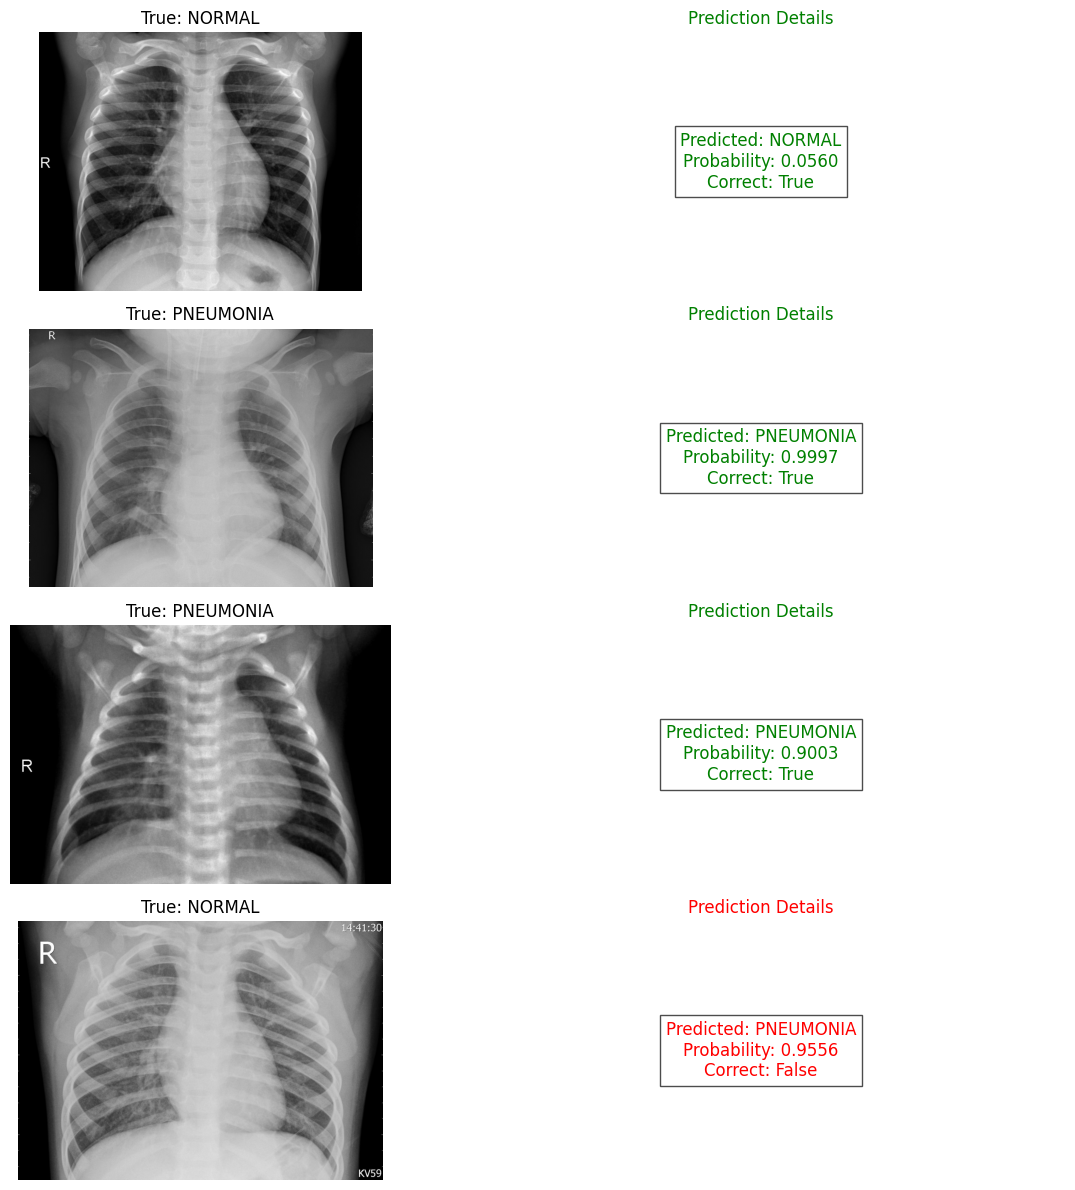


Visualization complete.


In [52]:
# Step 17.3: Select Random Images and Visualize Predictions

# Get lists of image files from each test subdirectory
normal_test_files = [os.path.join(normal_test_dir, f) for f in os.listdir(normal_test_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
pneumonia_test_files = [os.path.join(pneumonia_test_dir, f) for f in os.listdir(pneumonia_test_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Select a few random images (e.g., 2 Normal, 2 Pneumonia)
num_samples = 2
random_normal_samples = random.sample(normal_test_files, min(num_samples, len(normal_test_files)))
random_pneumonia_samples = random.sample(pneumonia_test_files, min(num_samples, len(pneumonia_test_files)))

# Combine the lists
sample_image_paths = random_normal_samples + random_pneumonia_samples
random.shuffle(sample_image_paths) # Shuffle to mix Normal and Pneumonia

print(f"Selecting {len(sample_image_paths)} random test images for visualization.")

# Make predictions and display results
plt.figure(figsize=(12, len(sample_image_paths) * 3)) # Adjust figure size

if model_for_viz is not None:
    for i, img_path in enumerate(sample_image_paths):
        true_class_name, predicted_class_name, prediction_prob, true_class_index, predicted_class_index = predict_image(model_for_viz, img_path, class_names)

        plt.subplot(len(sample_image_paths), 2, i * 2 + 1) # Image plot
        img = mpimg.imread(img_path)
        plt.imshow(img, cmap='gray')
        plt.title(f"True: {true_class_name}")
        plt.axis('off')

        plt.subplot(len(sample_image_paths), 2, i * 2 + 2) # Text plot
        # Use class_indices to determine if prediction was correct for coloring
        is_correct = (true_class_index == predicted_class_index)
        color = 'green' if is_correct else 'red'

        text_info = f"Predicted: {predicted_class_name}\n"
        text_info += f"Probability: {prediction_prob:.4f}\n"
        text_info += f"Correct: {is_correct}"

        plt.text(0.5, 0.5, text_info, horizontalalignment='center', verticalalignment='center',
                 fontsize=12, color=color, bbox=dict(facecolor='white', alpha=0.7))
        plt.title(f"Prediction Details", color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()
else:
    print("Model not available for visualization.")

print("\nVisualization complete.")